### 0) Utils

In [1]:
import pandas as pd
import numpy as np
import re
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
def load_metrics_logs(input_path):

    data_dict = {}

    pattern_list = r"([\w_]+):\s?(\[.*?\])"
    pattern_value = r"([\w_]+):\s?(\d+\.\d+)"

    text_seeds_folders = os.listdir(input_path)
        
    for experiment_folder in text_seeds_folders:
        experiment_name = experiment_folder
        experiment_folder = os.path.join(input_path, experiment_name)

        experiment_data = dict()

        with open(experiment_folder) as f:
            lines = [line.rstrip() for line in f]

            for line in lines:
                # Extract values using regular expressions
                matches = re.findall(pattern_list, line)
                
                # Store values in dictionaries
                for key, value in matches:
                    value = eval(value)
                    experiment_data[key] = value

                # Extract values using regular expressions
                matches = re.findall(pattern_value, line)
                
                # Store values in dictionaries
                for key, value in matches:
                    value = eval(value)
                    experiment_data[key] = value
                
        data_dict[experiment_name] = experiment_data
            
    return data_dict

### 1. Tabla audio

In [3]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\wav2vec2_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['audio'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_wav2vec2 = pd.DataFrame({'mean_wav2vec2': avg_audio_hubert,
                          'std_wav2vec2': std_audio_hubert})
df_wav2vec2.head()

,mean_wav2vec2,std_wav2vec2
0,0.540040,0.712066
1,0.022179,1.270888
2,0.755633,0.962670
3,-0.186641,0.666874
4,-0.945403,0.693463


In [4]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\hubert_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['audio'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_hubert = pd.DataFrame({'mean_hubert': avg_audio_hubert,
                          'std_hubert': std_audio_hubert})
df_hubert.head()

,mean_hubert,std_hubert
0,-1.068746,0.417562
1,0.484244,0.359230
2,-0.636903,0.648388
3,0.522064,0.399510
4,-0.382898,0.677739


In [5]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\uniSpeechSat_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['audio'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_uniSpeechSat = pd.DataFrame({'mean_uniSpeechSat': avg_audio_hubert,
                          'std_uniSpeechSat': std_audio_hubert})
df_uniSpeechSat.head()

,mean_uniSpeechSat,std_uniSpeechSat
0,0.535454,0.717126
1,0.015927,1.271486
2,0.751098,0.961236
3,-0.192541,0.666008
4,-0.948806,0.681219


In [6]:
data_dict_wavlm = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\wavLM_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['audio'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_wavLM = pd.DataFrame({'mean_wavLM': avg_audio_hubert,
                          'std_wavLM': std_audio_hubert})
df_wavLM.head()

,mean_wavLM,std_wavLM
0,0.535454,0.717126
1,0.015927,1.271486
2,0.751098,0.961236
3,-0.192541,0.666008
4,-0.948806,0.681219


In [7]:
df_final_audio = pd.concat([df_wav2vec2, df_hubert,
                      df_uniSpeechSat, df_wavLM], axis=1)
df_final_audio.head()

,mean_wav2vec2,std_wav2vec2,mean_hubert,std_hubert,mean_uniSpeechSat,std_uniSpeechSat,mean_wavLM,std_wavLM
0,0.540040,0.712066,-1.068746,0.417562,0.535454,0.717126,0.535454,0.717126
1,0.022179,1.270888,0.484244,0.359230,0.015927,1.271486,0.015927,1.271486
2,0.755633,0.962670,-0.636903,0.648388,0.751098,0.961236,0.751098,0.961236
3,-0.186641,0.666874,0.522064,0.399510,-0.192541,0.666008,-0.192541,0.666008
4,-0.945403,0.693463,-0.382898,0.677739,-0.948806,0.681219,-0.948806,0.681219


In [8]:
df_final_audio = df_final_audio.reset_index(drop=False)\
                   .rename({'index': 'Layer'}, axis=1)

df_final_audio['Layer'] = df_final_audio['Layer'] + 1

df_final_audio.head()

,Layer,mean_wav2vec2,std_wav2vec2,mean_hubert,std_hubert,mean_uniSpeechSat,std_uniSpeechSat,mean_wavLM,std_wavLM
0,1,0.540040,0.712066,-1.068746,0.417562,0.535454,0.717126,0.535454,0.717126
1,2,0.022179,1.270888,0.484244,0.359230,0.015927,1.271486,0.015927,1.271486
2,3,0.755633,0.962670,-0.636903,0.648388,0.751098,0.961236,0.751098,0.961236
3,4,-0.186641,0.666874,0.522064,0.399510,-0.192541,0.666008,-0.192541,0.666008
4,5,-0.945403,0.693463,-0.382898,0.677739,-0.948806,0.681219,-0.948806,0.681219


In [9]:
df_final_audio = df_final_audio.rename(columns={
                                            'mean_wav2vec2': 'mean_Wav2Vec2.0',
                                            'std_wav2vec2': 'std_Wav2Vec2.0',
                                            'mean_hubert': 'mean_HuBERT',
                                            'std_hubert': 'std_HuBERT',
                                            'mean_uniSpeechSat': 'mean_UniSpeechSAT',
                                            'std_uniSpeechSat': 'std_UniSpeechSAT',
                                            'mean_wavLM': 'mean_WavLM',
                                            'std_wavLM': 'std_WavLM'
                                            }
                                        )
df_final_audio.head()

,Layer,mean_Wav2Vec2.0,std_Wav2Vec2.0,mean_HuBERT,std_HuBERT,mean_UniSpeechSAT,std_UniSpeechSAT,mean_WavLM,std_WavLM
0,1,0.540040,0.712066,-1.068746,0.417562,0.535454,0.717126,0.535454,0.717126
1,2,0.022179,1.270888,0.484244,0.359230,0.015927,1.271486,0.015927,1.271486
2,3,0.755633,0.962670,-0.636903,0.648388,0.751098,0.961236,0.751098,0.961236
3,4,-0.186641,0.666874,0.522064,0.399510,-0.192541,0.666008,-0.192541,0.666008
4,5,-0.945403,0.693463,-0.382898,0.677739,-0.948806,0.681219,-0.948806,0.681219


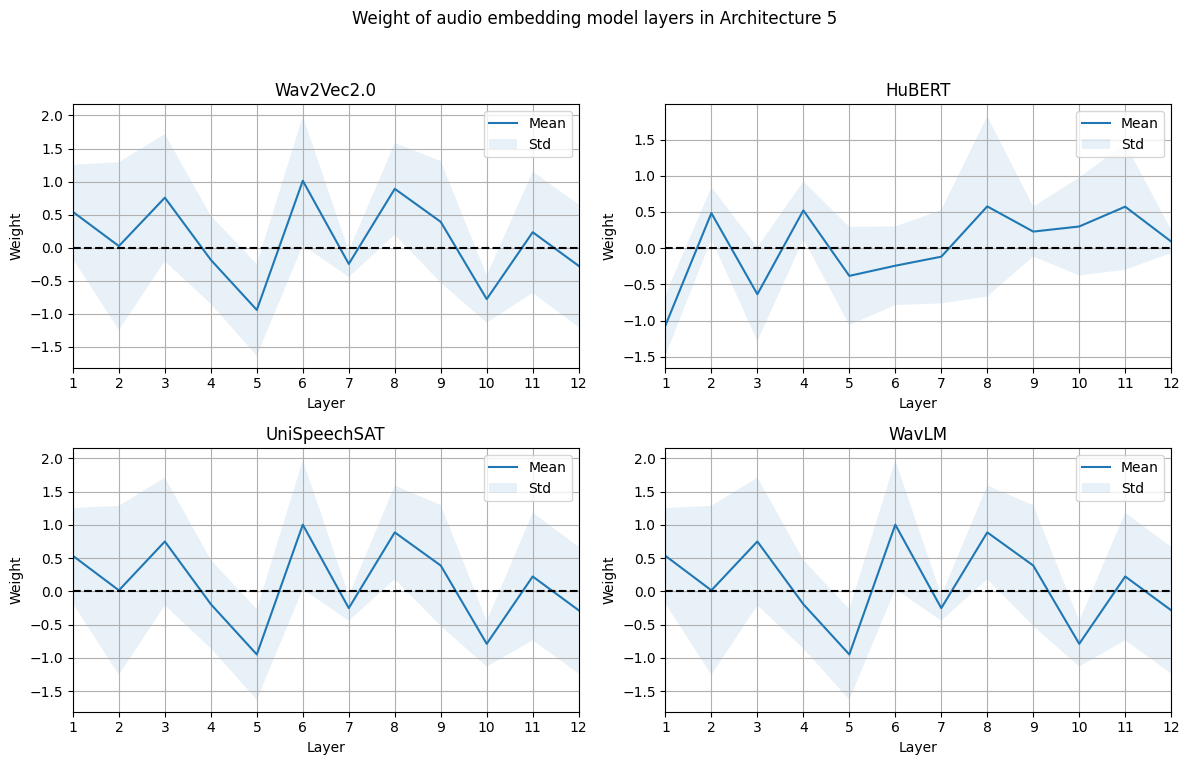

In [10]:
# Plotting
variables = ['Wav2Vec2.0', 'HuBERT', 'UniSpeechSAT', 'WavLM']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Weight of audio embedding model layers in Architecture 5')
axs = axs.ravel()

# Define the xticks range
xticks = list(range(1, 13))

for i, variable in enumerate(variables):
    mean_column = 'mean_' + variable
    std_column = 'std_' + variable

    axs[i].plot(df_final_audio['Layer'], df_final_audio[mean_column], label='Mean')
    axs[i].fill_between(df_final_audio['Layer'], df_final_audio[mean_column] - df_final_audio[std_column], 
                        df_final_audio[mean_column] + df_final_audio[std_column], alpha=0.1, label='Std')
    axs[i].set_title(variable)
    axs[i].axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
    axs[i].set_xlabel('Layer')
    axs[i].set_ylabel('Weight')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_xticks(xticks)  # Set the xticks from 1 to 12
    axs[i].set_xlim([1, 12])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

### 2. Tabla texto

In [11]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\wav2vec2_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['text'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_wav2vec2 = pd.DataFrame({'mean_wav2vec2': avg_audio_hubert,
                          'std_wav2vec2': std_audio_hubert})
df_wav2vec2.head()

,mean_wav2vec2,std_wav2vec2
0,0.034632,0.388008
1,-0.291974,0.283908
2,-0.832969,0.574143
3,-0.681660,0.380432
4,0.689041,0.654826


In [12]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\hubert_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['text'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_hubert = pd.DataFrame({'mean_hubert': avg_audio_hubert,
                          'std_hubert': std_audio_hubert})
df_hubert.head()

,mean_hubert,std_hubert
0,0.026717,0.391965
1,-0.303070,0.284863
2,-0.840519,0.569192
3,-0.689065,0.382471
4,0.684129,0.651001


In [13]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\uniSpeechSat_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['text'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_uniSpeechSat = pd.DataFrame({'mean_uniSpeechSat': avg_audio_hubert,
                                'std_uniSpeechSat': std_audio_hubert})
df_uniSpeechSat.head()

,mean_uniSpeechSat,std_uniSpeechSat
0,0.027332,0.392377
1,-0.299566,0.282660
2,-0.837581,0.574895
3,-0.685967,0.378943
4,0.684814,0.656056


In [14]:
data_dict_hubert = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\uniSpeechSat_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['text'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_uniSpeechSat = pd.DataFrame({'mean_uniSpeechSat': avg_audio_hubert,
                                'std_uniSpeechSat': std_audio_hubert})
df_uniSpeechSat.head()

,mean_uniSpeechSat,std_uniSpeechSat
0,0.027332,0.392377
1,-0.299566,0.282660
2,-0.837581,0.574895
3,-0.685967,0.378943
4,0.684814,0.656056


In [15]:
data_dict_wavlm = load_metrics_logs('C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\wavLM_layer_weights_fede')

audio_hubert = [data_dict_hubert[experiment]['text'] for experiment in data_dict_hubert]
audio_hubert = np.array(audio_hubert)

avg_audio_hubert = np.mean(audio_hubert, axis=0)
std_audio_hubert = np.std(audio_hubert, axis=0)

df_wavLM = pd.DataFrame({'mean_wavLM': avg_audio_hubert,
                          'std_wavLM': std_audio_hubert})
df_wavLM.head()

,mean_wavLM,std_wavLM
0,0.027332,0.392377
1,-0.299566,0.282660
2,-0.837581,0.574895
3,-0.685967,0.378943
4,0.684814,0.656056


In [16]:
df_final_text = pd.concat([df_wav2vec2, df_hubert,
                      df_uniSpeechSat, df_wavLM], axis=1)
df_final_text.head()

,mean_wav2vec2,std_wav2vec2,mean_hubert,std_hubert,mean_uniSpeechSat,std_uniSpeechSat,mean_wavLM,std_wavLM
0,0.034632,0.388008,0.026717,0.391965,0.027332,0.392377,0.027332,0.392377
1,-0.291974,0.283908,-0.303070,0.284863,-0.299566,0.282660,-0.299566,0.282660
2,-0.832969,0.574143,-0.840519,0.569192,-0.837581,0.574895,-0.837581,0.574895
3,-0.681660,0.380432,-0.689065,0.382471,-0.685967,0.378943,-0.685967,0.378943
4,0.689041,0.654826,0.684129,0.651001,0.684814,0.656056,0.684814,0.656056


In [17]:
df_final_text = df_final_text.reset_index(drop=False)\
                   .rename({'index': 'Layer'}, axis=1)

df_final_text['Layer'] = df_final_text['Layer'] + 1

df_final_text.head()

,Layer,mean_wav2vec2,std_wav2vec2,mean_hubert,std_hubert,mean_uniSpeechSat,std_uniSpeechSat,mean_wavLM,std_wavLM
0,1,0.034632,0.388008,0.026717,0.391965,0.027332,0.392377,0.027332,0.392377
1,2,-0.291974,0.283908,-0.303070,0.284863,-0.299566,0.282660,-0.299566,0.282660
2,3,-0.832969,0.574143,-0.840519,0.569192,-0.837581,0.574895,-0.837581,0.574895
3,4,-0.681660,0.380432,-0.689065,0.382471,-0.685967,0.378943,-0.685967,0.378943
4,5,0.689041,0.654826,0.684129,0.651001,0.684814,0.656056,0.684814,0.656056


In [18]:
df_final_text = df_final_text.rename(columns={
                                            'mean_wav2vec2': 'mean_Wav2Vec2.0',
                                            'std_wav2vec2': 'std_Wav2Vec2.0',
                                            'mean_hubert': 'mean_HuBERT',
                                            'std_hubert': 'std_HuBERT',
                                            'mean_uniSpeechSat': 'mean_UniSpeechSAT',
                                            'std_uniSpeechSat': 'std_UniSpeechSAT',
                                            'mean_wavLM': 'mean_WavLM',
                                            'std_wavLM': 'std_WavLM'
                                            }
                                        )
df_final_text.head()

,Layer,mean_Wav2Vec2.0,std_Wav2Vec2.0,mean_HuBERT,std_HuBERT,mean_UniSpeechSAT,std_UniSpeechSAT,mean_WavLM,std_WavLM
0,1,0.034632,0.388008,0.026717,0.391965,0.027332,0.392377,0.027332,0.392377
1,2,-0.291974,0.283908,-0.303070,0.284863,-0.299566,0.282660,-0.299566,0.282660
2,3,-0.832969,0.574143,-0.840519,0.569192,-0.837581,0.574895,-0.837581,0.574895
3,4,-0.681660,0.380432,-0.689065,0.382471,-0.685967,0.378943,-0.685967,0.378943
4,5,0.689041,0.654826,0.684129,0.651001,0.684814,0.656056,0.684814,0.656056


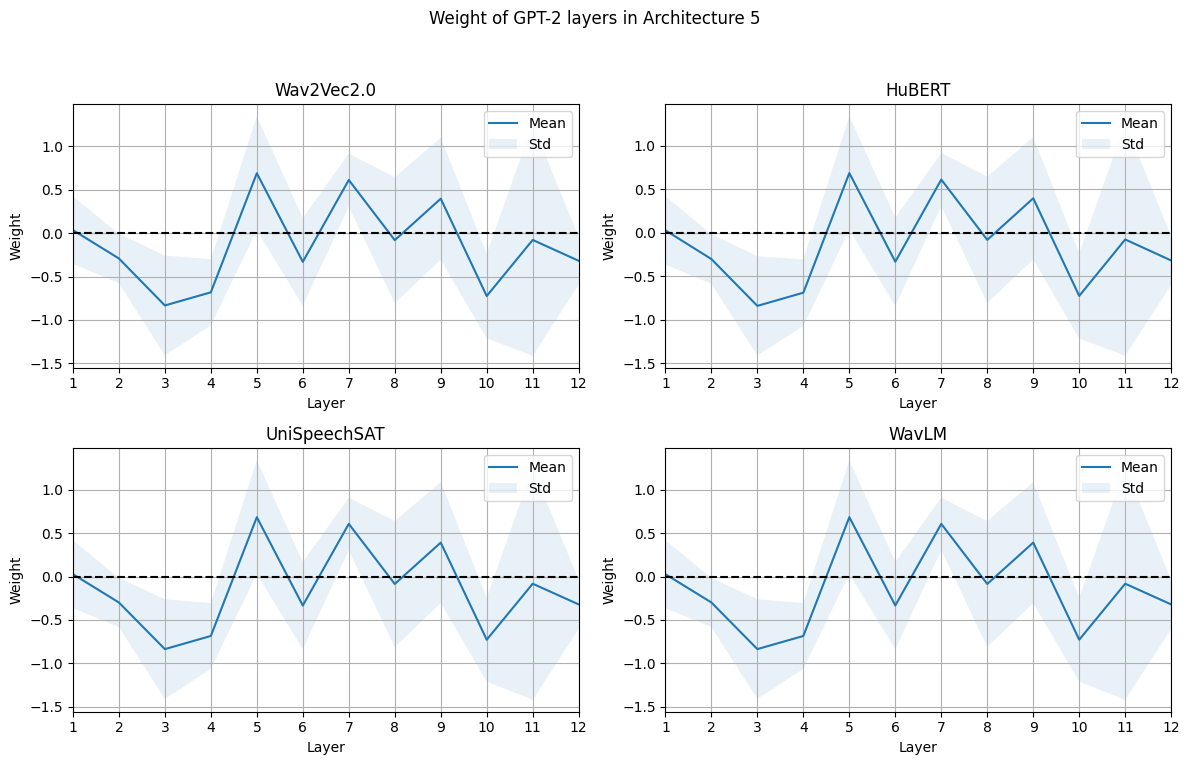

In [19]:
# Plotting
variables = ['Wav2Vec2.0', 'HuBERT', 'UniSpeechSAT', 'WavLM']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Weight of GPT-2 layers in Architecture 5')
axs = axs.ravel()

# Define the xticks range
xticks = list(range(1, 13))

for i, variable in enumerate(variables):
    mean_column = 'mean_' + variable
    std_column = 'std_' + variable

    axs[i].plot(df_final_text['Layer'], df_final_text[mean_column], label='Mean')
    axs[i].fill_between(df_final_text['Layer'], df_final_text[mean_column] - df_final_text[std_column], 
                        df_final_text[mean_column] + df_final_text[std_column], alpha=0.1, label='Std')
    axs[i].set_title(variable)
    axs[i].set_xlabel('Layer')
    axs[i].axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
    axs[i].set_ylabel('Weight')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_xticks(xticks)  # Set the xticks from 1 to 12
    axs[i].set_xlim([1,12])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()
